In [1]:
import pandas as pd
import numpy as np



# importing the libraries 


# libraries for data wrangling and numerical computation
import pandas as pd
import numpy as np 
import math


# libraries for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# libraries for machine learning modelling
from sklearn.linear_model import LogisticRegression


# libraries for model evaluation
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\New folder\Python Data Class\unstructured\data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# check null vaues and datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# changing ID datatype to string

data['id'] = data.astype({'id':'str'}).dtypes

In [6]:
data.isnull().sum()

id                         569
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave_points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
dtype: i

In [7]:
data.drop(['id'], axis= 1, inplace= True)
data.reset_index(inplace= True)

In [8]:
data['id'] = data['index']
data.drop(columns= ['index'], inplace= True)
data['id'] = [x+1 for x in data['id']]

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,id
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,3
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,4
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,5


In [10]:
data['diagnosis'] = ['cancer' if x == 'M' else 'No cancer' for x in data.diagnosis]

In [11]:
px.histogram(data_frame= data, x = 'diagnosis',
             title = 'NO OF CANCEROUS AND NON CANCEOUS DIAGNOSIS',
             color= 'diagnosis')

C:\Users\hp\AppData\Local\Temp\ipykernel_16944\4003811460.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

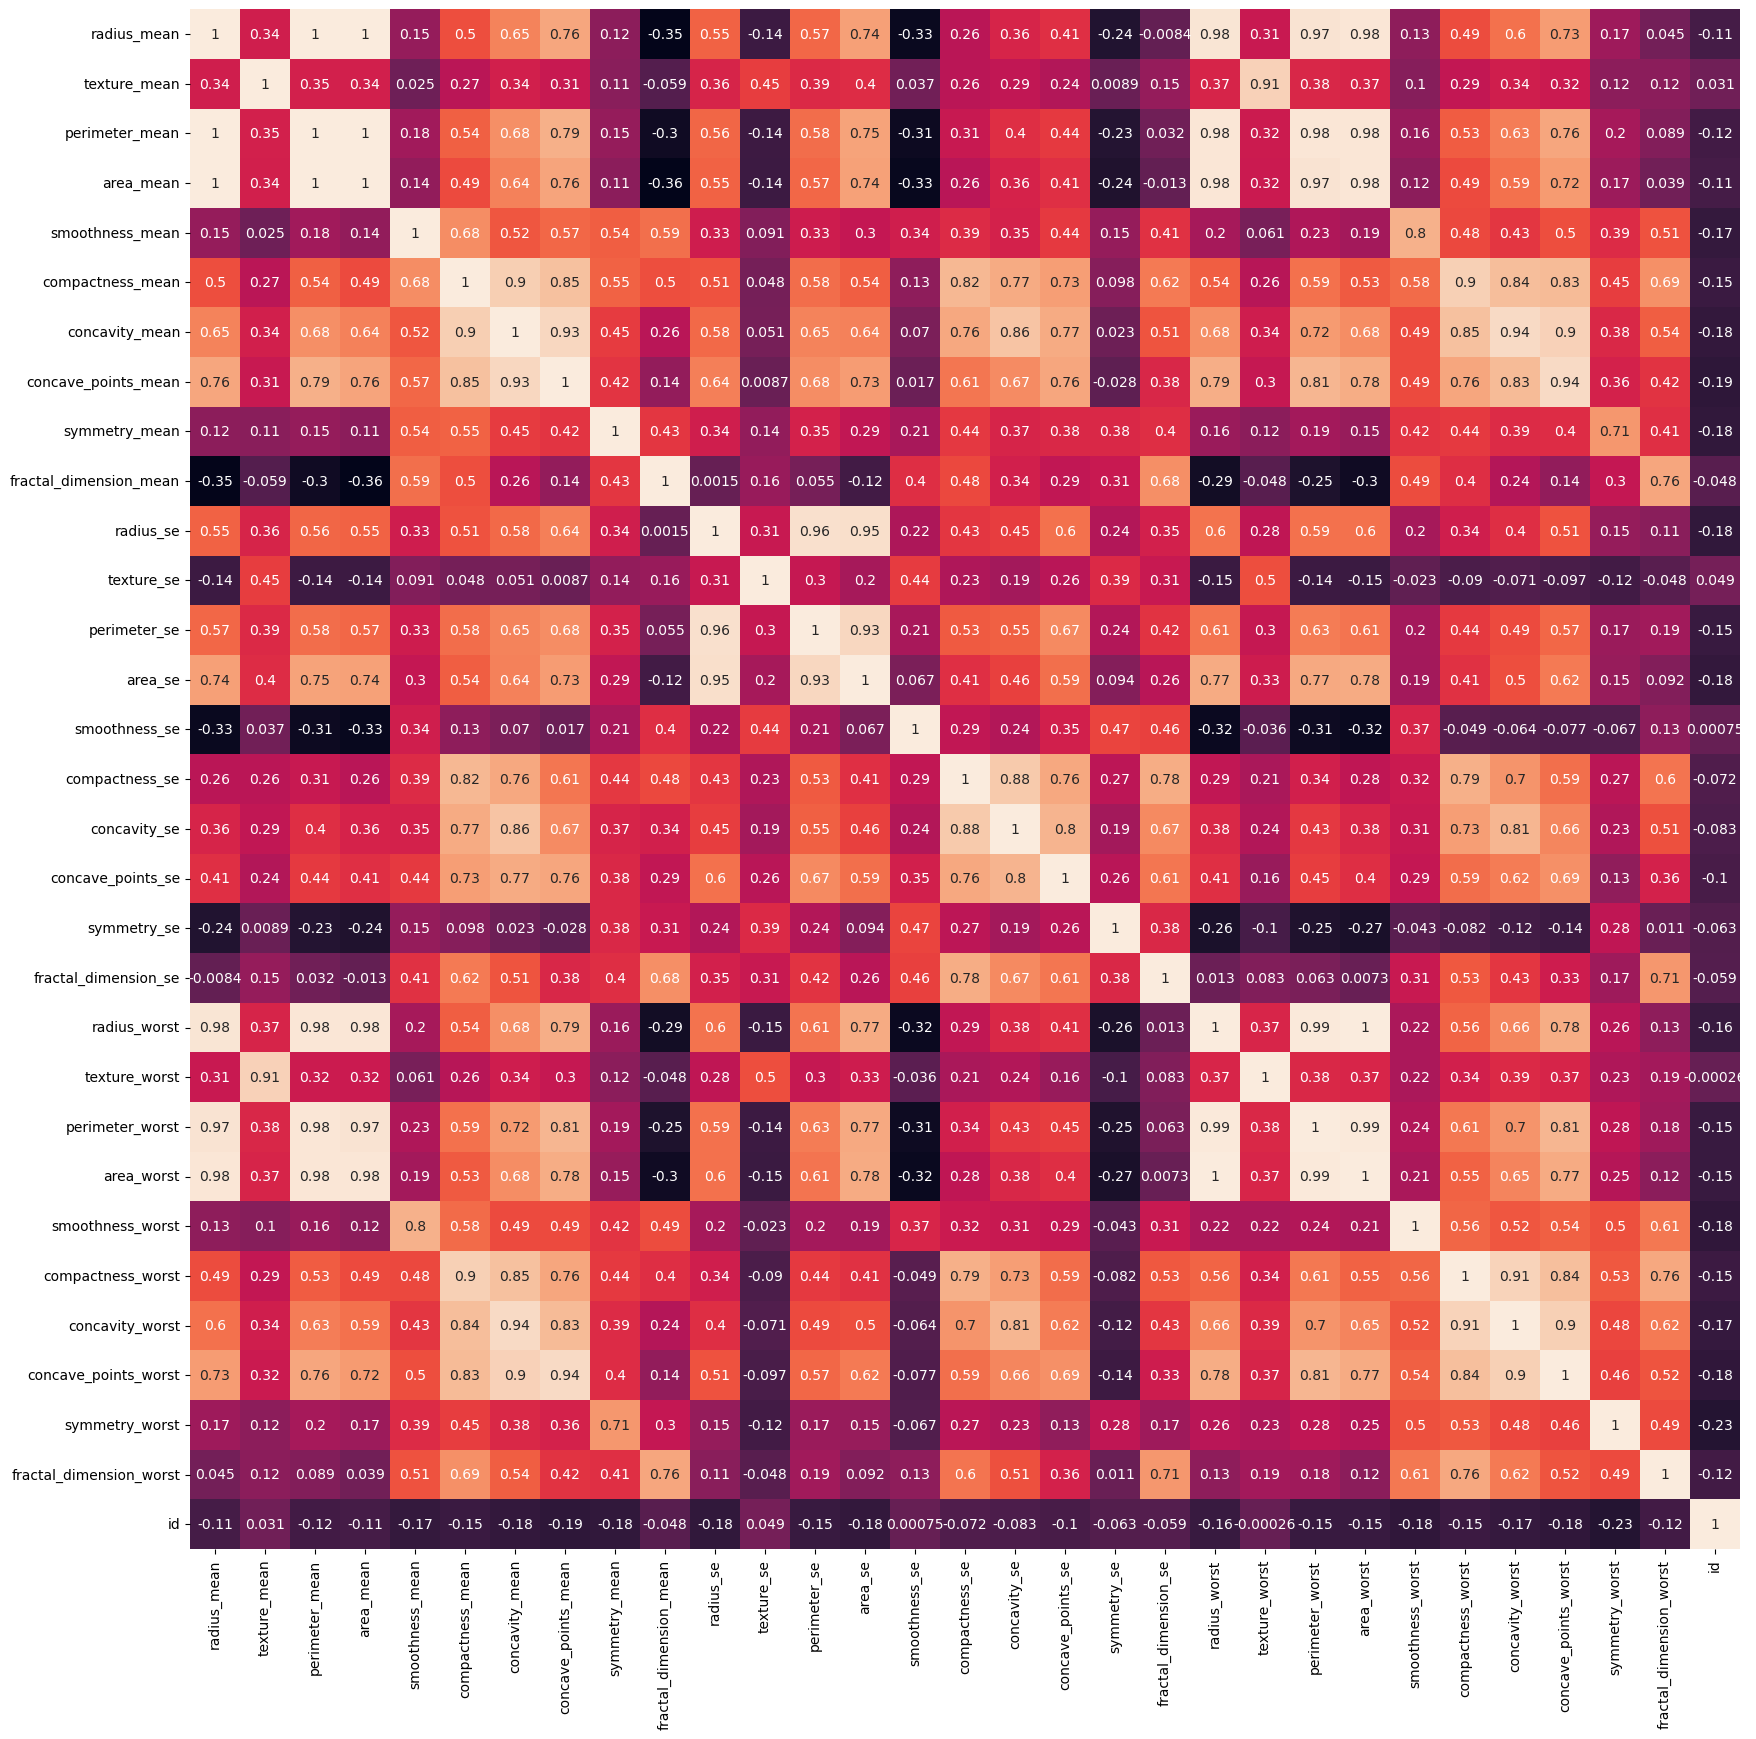

In [12]:
corr_data = data.corr(method= 'spearman')

plt.figure(figsize= (20,20))
sns.heatmap(corr_data, annot= True, cbar= False)

In [13]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

y = encoder.fit_transform(data['diagnosis'])

In [14]:
x = data.drop(['id','diagnosis'], axis= 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [16]:
lr = LogisticRegression()

model = lr.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [17]:
print(accuracy_score(y_true=y_test, y_pred=test_pred))
print(accuracy_score(y_true=y_train, y_pred=train_pred))

0.9649122807017544
0.989010989010989


Text(50.722222222222214, 0.5, 'Predicted Outcome')

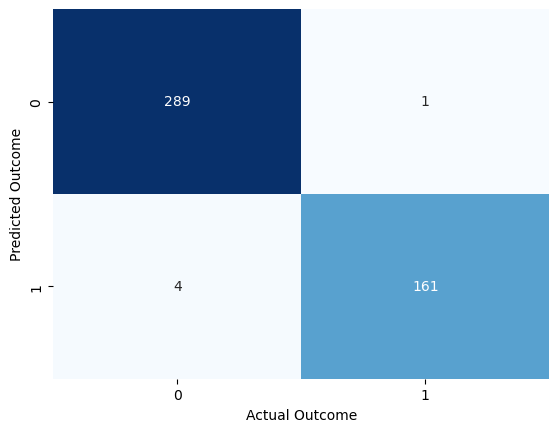

In [18]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=y_train, y_pred=train_pred)

sns.heatmap(confusion, annot= True, cmap= 'Blues', fmt = '0.0f', cbar= False)

plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')

Text(95.72222222222221, 0.5, 'Predicted Outcome')

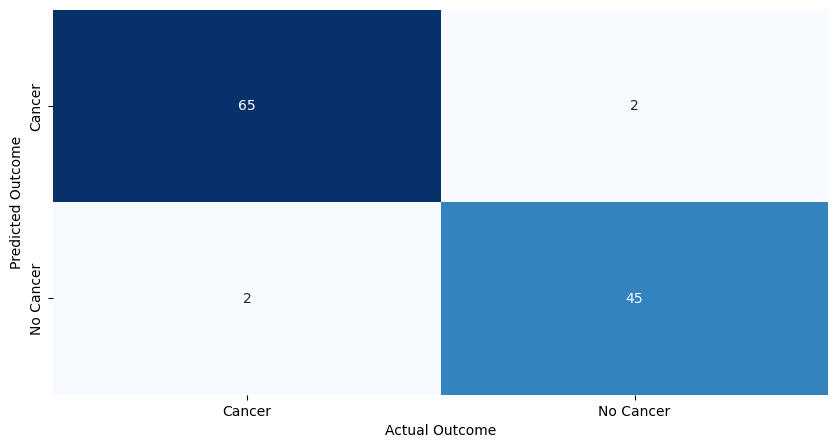

In [29]:
confusion_2 = confusion_matrix(y_test, test_pred)
confusion_df = pd.DataFrame(data = confusion_2, columns= ['Cancer', 'No Cancer'],
                            index = ['Cancer', 'No Cancer'])


plt.figure(figsize= (10,5))
sns.heatmap(confusion_df, annot = True, cmap = 'Blues', cbar = False)


plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')

In [30]:
confusion_2

array([[65,  2],
       [ 2, 45]], dtype=int64)

In [31]:
confusion_df

,Cancer,No Cancer
Cancer,65,2
No Cancer,2,45


In [57]:
# precision, recall, F1 score

def precision_recall(confusion):
    precision = confusion[0][0]/confusion[0].sum()
    recall = confusion[0][0]/(confusion[0][0] + confusion_2[1][0])
    f1_score = 2 * (precision * recall)/ (precision + recall)
    
    return precision, recall, f1_score

In [58]:
precision, recall, f1_score = precision_recall(confusion = confusion_2)

print(precision)
print(recall)
print(f1_score)

0.9701492537313433
0.9701492537313433
0.9701492537313433


In [60]:
precision_train, recall_train, f1_score_train = precision_recall(confusion=confusion)

print(precision_train)
print(recall_train)
print(f1_score_train)

0.996551724137931
0.993127147766323
0.9948364888123924


In [61]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print(precision_score(y_train, train_pred))
print(recall_score(y_train, train_pred))
print(f1_score(y_train, train_pred))

0.9938271604938271
0.9757575757575757
0.9847094801223242


In [ ]:
https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package